In [1]:
from __future__ import division
from __future__ import print_function
%matplotlib inline

# ignore deprecation warnings in sklearn
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import os
import sys

# add the 'src' directory as one where we can import modules
src_dir = os.path.join(os.getcwd(), os.pardir, 'src')
sys.path.append(src_dir)

from data.multilabel import multilabel_sample_dataframe, multilabel_train_test_split
from features.SparseInteractions import SparseInteractions
from models.metrics import multi_multi_log_loss

In [2]:
print(os.pardir)

..


In [3]:
os.path.join(os.getcwd(), os.pardir, 'src')

'/Users/Thap/PycharmProjects/python_basics_to_advanced/school_budgets/notebooks/../src'

# Load Data

In [4]:
path_to_training_data = os.path.join(os.pardir,
                                     'data',
                                     'TrainingSet.csv')

df = pd.read_csv(path_to_training_data, index_col=0)

print(df.shape)

(400277, 25)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400277 entries, 134338 to 415831
Data columns (total 25 columns):
Function                  400277 non-null object
Use                       400277 non-null object
Sharing                   400277 non-null object
Reporting                 400277 non-null object
Student_Type              400277 non-null object
Position_Type             400277 non-null object
Object_Type               400277 non-null object
Pre_K                     400277 non-null object
Operating_Status          400277 non-null object
Object_Description        375493 non-null object
Text_2                    88217 non-null object
SubFund_Description       306855 non-null object
Job_Title_Description     292743 non-null object
Text_3                    109152 non-null object
Text_4                    53746 non-null object
Sub_Object_Description    91603 non-null object
Location_Description      162054 non-null object
FTE                       126071 non-null float64
Func

In [6]:
df.columns

Index(['Function', 'Use', 'Sharing', 'Reporting', 'Student_Type',
       'Position_Type', 'Object_Type', 'Pre_K', 'Operating_Status',
       'Object_Description', 'Text_2', 'SubFund_Description',
       'Job_Title_Description', 'Text_3', 'Text_4', 'Sub_Object_Description',
       'Location_Description', 'FTE', 'Function_Description',
       'Facility_or_Department', 'Position_Extra', 'Total',
       'Program_Description', 'Fund_Description', 'Text_1'],
      dtype='object')

In [7]:
df.describe()

,FTE,Total
count,126071.000000,3.957220e+05
mean,0.426794,1.310586e+04
std,0.573576,3.682254e+05
min,-0.087551,-8.746631e+07
25%,0.000792,7.379770e+01
50%,0.130927,4.612300e+02
75%,1.000000,3.652662e+03
max,46.800000,1.297000e+08


In [8]:
pd.set_option('display.max_columns', None)
df.head()

,Function,Use,Sharing,Reporting,Student_Type,Position_Type,Object_Type,Pre_K,Operating_Status,Object_Description,Text_2,SubFund_Description,Job_Title_Description,Text_3,Text_4,Sub_Object_Description,Location_Description,FTE,Function_Description,Facility_or_Department,Position_Extra,Total,Program_Description,Fund_Description,Text_1
134338,Teacher Compensation,Instruction,School Reported,School,NO_LABEL,Teacher,NO_LABEL,NO_LABEL,PreK-12 Operating,NaN,NaN,NaN,Teacher-Elementary,NaN,NaN,NaN,NaN,1.0,NaN,NaN,KINDERGARTEN,50471.810,KINDERGARTEN,General Fund,NaN
206341,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,CONTRACTOR SERVICES,BOND EXPENDITURES,BUILDING FUND,(blank),Regular,NaN,NaN,NaN,NaN,RGN GOB,NaN,UNDESIGNATED,3477.860,BUILDING IMPROVEMENT SERVICES,NaN,BUILDING IMPROVEMENT SERVICES
326408,Teacher Compensation,Instruction,School Reported,School,Unspecified,Teacher,Base Salary/Compensation,Non PreK,PreK-12 Operating,Personal Services - Teachers,NaN,NaN,TCHER 2ND GRADE,NaN,Regular Instruction,NaN,NaN,1.0,NaN,NaN,TEACHER,62237.130,Instruction - Regular,General Purpose School,NaN
364634,Substitute Compensation,Instruction,School Reported,School,Unspecified,Substitute,Benefits,NO_LABEL,PreK-12 Operating,EMPLOYEE BENEFITS,TEACHER SUBS,GENERAL FUND,"Teacher, Short Term Sub",Regular,NaN,NaN,NaN,NaN,UNALLOC BUDGETS/SCHOOLS,NaN,PROFESSIONAL-INSTRUCTIONAL,22.300,GENERAL MIDDLE/JUNIOR HIGH SCH,NaN,REGULAR INSTRUCTION
47683,Substitute Compensation,Instruction,School Reported,School,Unspecified,Teacher,Substitute Compensation,NO_LABEL,PreK-12 Operating,TEACHER COVERAGE FOR TEACHER,TEACHER SUBS,GENERAL FUND,"Teacher, Secondary (High)",Alternative,NaN,NaN,NaN,NaN,NON-PROJECT,NaN,PROFESSIONAL-INSTRUCTIONAL,54.166,GENERAL HIGH SCHOOL EDUCATION,NaN,REGULAR INSTRUCTION


In [9]:
df.tail()

,Function,Use,Sharing,Reporting,Student_Type,Position_Type,Object_Type,Pre_K,Operating_Status,Object_Description,Text_2,SubFund_Description,Job_Title_Description,Text_3,Text_4,Sub_Object_Description,Location_Description,FTE,Function_Description,Facility_or_Department,Position_Extra,Total,Program_Description,Fund_Description,Text_1
109283,Professional Development,ISPD,Shared Services,Non-School,Unspecified,Instructional Coach,Other Compensation/Stipend,NO_LABEL,PreK-12 Operating,WORKSHOP PARTICIPANT,NaN,NaN,CURRICULUM RESOURCE TEACHER,NaN,NaN,NaN,STAFF DEV AND INSTR MEDIA,NaN,INST STAFF TRAINING SVCS,NaN,NaN,48.620000,NaN,GENERAL FUND,STAFF DEV AND INSTR MEDIA
102430,Substitute Compensation,Instruction,School Reported,School,Unspecified,Substitute,Base Salary/Compensation,NO_LABEL,PreK-12 Operating,SALARIES OF PART TIME EMPLOYEE,NaN,FEDERAL GDPG FUND - FY,"Teacher,Retrd Shrt Term Sub",Regular,NaN,NaN,NaN,0.00431,"TITLE II,D",NaN,PROFESSIONAL-INSTRUCTIONAL,128.824985,INSTRUCTIONAL STAFF TRAINING,NaN,INSTRUCTIONAL STAFF
413949,Parent & Community Relations,NO_LABEL,School Reported,School,NO_LABEL,Other,NO_LABEL,NO_LABEL,PreK-12 Operating,NaN,NaN,NaN,School Liaison,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,PARENT/TITLE I,4902.290000,Misc,Schoolwide Schools,NaN
433672,Library & Media,Instruction,School on Central Budgets,Non-School,Unspecified,Librarian,Benefits,NO_LABEL,PreK-12 Operating,EMPLOYEE BENEFITS,EDUCATIONAL RESOURCE SERVICES,LEVY OVERRIDE,Library Technician II,NaN,NaN,NaN,ED RESOURCE SERVICES,NaN,NON-PROJECT,NaN,OFFICE/ADMINISTRATIVE SUPPORT,4020.290000,MEDIA SUPPORT SERVICES,NaN,INSTRUCTIONAL STAFF
415831,Substitute Compensation,Instruction,School Reported,School,Poverty,Substitute,Substitute Compensation,Non PreK,PreK-12 Operating,Salaries And Wages For Substitute Professionals,NaN,"""Title Part A Improving Basic Programs""",TEACHER SUBSTITUTE POOL,NaN,Multilingual Dist Prof Development,Inservice Substitute Teachers Grant Funded,School,NaN,Instruction,Instruction And Curriculum,CERTIFIED SUBSTITUTE,46.530000,Accelerated Education,"""Title Part A Improving Basic Programs""",MISCELLANEOUS


In [10]:
df.FTE[(df.FTE < 0) | (df.FTE > 10)]

111271   -2.001232e-02
137214    1.020000e+01
441763   -5.434779e-02
210055    1.700000e+01
408318    1.300000e+01
131081    1.140000e+01
5013      1.560000e+01
105857    4.020000e+01
341426   -2.368745e-03
331522   -4.167114e-02
29425    -1.811503e-02
89971     1.170000e+01
202976   -1.524717e-03
185439   -1.063836e-03
150286    1.300000e+01
386835    2.310000e+01
246720    1.460000e+01
432592   -7.443467e-07
285732    2.280000e+01
343482   -8.755064e-02
105740   -3.020340e-02
198366   -3.886916e-02
16056     1.140000e+01
7573     -1.121296e-06
168205    1.260000e+01
218456   -3.469447e-18
263750   -2.512373e-07
391218   -1.301321e-06
46630     1.680000e+01
89857    -2.803241e-07
              ...     
33829    -6.122449e-02
226837   -8.333574e-02
356334    2.190000e+01
93614    -7.280316e-07
144109   -4.336809e-19
249494    1.200000e+01
350549   -8.163265e-03
404264    3.110000e+01
301497   -1.857183e-06
362251    3.420000e+01
253483   -1.630427e-02
225062    1.180000e+01
243201    1

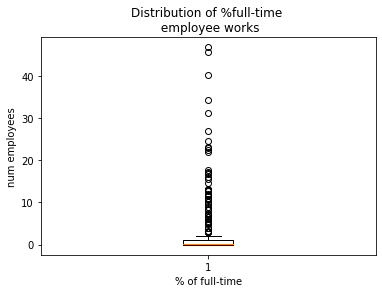

In [11]:
plt.boxplot(df.FTE.dropna())
plt.title('Distribution of %full-time \n employee works')
plt.xlabel('% of full-time')
plt.ylabel('num employees')
plt.show()

# Resample Data

In [12]:
LABELS = ['Function',
          'Use',
          'Sharing',
          'Reporting',
          'Student_Type',
          'Position_Type',
          'Object_Type', 
          'Pre_K',
          'Operating_Status']

NON_LABELS = [c for c in df.columns if c not in LABELS]

SAMPLE_SIZE = 40000

sampling = multilabel_sample_dataframe(df,
                                       pd.get_dummies(df[LABELS]),
                                       size=SAMPLE_SIZE,
                                       min_count=25,
                                       seed=43)

dummy_labels = pd.get_dummies(sampling[LABELS])

X_train, X_test, y_train, y_test = multilabel_train_test_split(sampling[NON_LABELS],
                                                               dummy_labels,
                                                               0.2,
                                                               min_count=3,
                                                               seed=43)

In [13]:
NON_LABELS

['Object_Description',
 'Text_2',
 'SubFund_Description',
 'Job_Title_Description',
 'Text_3',
 'Text_4',
 'Sub_Object_Description',
 'Location_Description',
 'FTE',
 'Function_Description',
 'Facility_or_Department',
 'Position_Extra',
 'Total',
 'Program_Description',
 'Fund_Description',
 'Text_1']

In [14]:
pd.get_dummies(df[LABELS])

,Function_Aides Compensation,Function_Career & Academic Counseling,Function_Communications,Function_Curriculum Development,Function_Data Processing & Information Services,Function_Development & Fundraising,Function_Enrichment,Function_Extended Time & Tutoring,Function_Facilities & Maintenance,Function_Facilities Planning,"Function_Finance, Budget, Purchasing & Distribution",Function_Food Services,Function_Governance,Function_Human Resources,Function_Instructional Materials & Supplies,Function_Insurance,Function_Legal,Function_Library & Media,Function_NO_LABEL,Function_Other Compensation,Function_Other Non-Compensation,Function_Parent & Community Relations,Function_Physical Health & Services,Function_Professional Development,Function_Recruitment,Function_Research & Accountability,Function_School Administration,Function_School Supervision,Function_Security & Safety,Function_Social & Emotional,Function_Special Population Program Management & Support,Function_Student Assignment,Function_Student Transportation,Function_Substitute Compensation,Function_Teacher Compensation,Function_Untracked Budget Set-Aside,Function_Utilities,Use_Business Services,Use_ISPD,Use_Instruction,Use_Leadership,Use_NO_LABEL,Use_O&M,Use_Pupil Services & Enrichment,Use_Untracked Budget Set-Aside,Sharing_Leadership & Management,Sharing_NO_LABEL,Sharing_School Reported,Sharing_School on Central Budgets,Sharing_Shared Services,Reporting_NO_LABEL,Reporting_Non-School,Reporting_School,Student_Type_Alternative,Student_Type_At Risk,Student_Type_ELL,Student_Type_Gifted,Student_Type_NO_LABEL,Student_Type_Poverty,Student_Type_PreK,Student_Type_Special Education,Student_Type_Unspecified,Position_Type_(Exec) Director,Position_Type_Area Officers,Position_Type_Club Advisor/Coach,Position_Type_Coordinator/Manager,Position_Type_Custodian,Position_Type_Guidance Counselor,Position_Type_Instructional Coach,Position_Type_Librarian,Position_Type_NO_LABEL,Position_Type_Non-Position,Position_Type_Nurse,Position_Type_Nurse Aide,Position_Type_Occupational Therapist,Position_Type_Other,Position_Type_Physical Therapist,Position_Type_Principal,Position_Type_Psychologist,Position_Type_School Monitor/Security,Position_Type_Sec/Clerk/Other Admin,Position_Type_Social Worker,Position_Type_Speech Therapist,Position_Type_Substitute,Position_Type_TA,Position_Type_Teacher,Position_Type_Vice Principal,Object_Type_Base Salary/Compensation,Object_Type_Benefits,Object_Type_Contracted Services,Object_Type_Equipment & Equipment Lease,Object_Type_NO_LABEL,Object_Type_Other Compensation/Stipend,Object_Type_Other Non-Compensation,Object_Type_Rent/Utilities,Object_Type_Substitute Compensation,Object_Type_Supplies/Materials,Object_Type_Travel & Conferences,Pre_K_NO_LABEL,Pre_K_Non PreK,Pre_K_PreK,Operating_Status_Non-Operating,"Operating_Status_Operating, Not PreK-12",Operating_Status_PreK-12 Operating
134338,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
206341,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
326408,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
364634,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
47683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
229958,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0

# Create Preprocessing Tools

In [15]:
NUMERIC_COLUMNS = ['FTE', "Total"]

def combine_text_columns(data_frame, to_drop=NUMERIC_COLUMNS + LABELS):
    """ Takes the dataset as read in, drops the non-feature, non-text columns and
        then combines all of the text columns into a single vector that has all of
        the text for a row.
        
        :param data_frame: The data as read in with read_csv (no preprocessing necessary)
        :param to_drop (optional): Removes the numeric and label columns by default.
    """
    # drop non-text columns that are in the df
    to_drop = set(to_drop) & set(data_frame.columns.tolist())
    text_data = data_frame.drop(to_drop, axis=1)
    
    # replace nans with blanks
    text_data.fillna("", inplace=True)
    
    # joins all of the text items in a row (axis=1)
    # with a space in between
    return text_data.apply(lambda x: " ".join(x), axis=1)


In [16]:
from sklearn.preprocessing import FunctionTransformer

get_text_data = FunctionTransformer(combine_text_columns, validate=False)
get_numeric_data = FunctionTransformer(lambda x: x[NUMERIC_COLUMNS], validate=False)

In [17]:
get_text_data.fit_transform(sampling.head(5))

38     OTHER PURCHASED SERVICES  SCHOOL-WIDE SCHOOL P...
70     Extra Duty Pay/Overtime For Support Personnel ...
198    Supplemental *  Operation and Maintenance of P...
209    REPAIR AND MAINTENANCE SERVICES  PUPIL TRANSPO...
614     GENERAL EDUCATION LOCAL EDUCATIONAL AIDE,70 H...
dtype: object

In [18]:
get_numeric_data.fit_transform(sampling.head(5))

,FTE,Total
38,NaN,653.460000
70,NaN,2153.530000
198,NaN,-8291.860000
209,NaN,618.290000
614,0.71,21747.666875


In [19]:
from sklearn.metrics.scorer import make_scorer

log_loss_scorer = make_scorer(multi_multi_log_loss)

In [20]:
log_loss_scorer

make_scorer(multi_multi_log_loss)

# Train Model Pipeline

In [30]:
from sklearn.feature_selection import chi2, SelectKBest

from sklearn.pipeline import Pipeline, FeatureUnion

from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import HashingVectorizer, TfidfVectorizer, CountVectorizer

from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import MaxAbsScaler

TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

In [32]:
%%time

# set a reasonable number of features before adding interactions
chi_k = 300

# create the pipeline object
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', SimpleImputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', TfidfVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
                                                     norm=None, binary=False,
                                                     ngram_range=(1, 2))),
                    ('dim_red', SelectKBest(chi2, chi_k))
                ]))
             ]
        )),
        ('int', SparseInteractions(degree=2)),
        ('scale', MaxAbsScaler()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# fit the pipeline to our training data
pl.fit(X_train, y_train.values)

# print the score of our trained pipeline on our test set
print("Logloss score of trained pipeline: ", log_loss_scorer(pl, X_test, y_test.values))

Logloss score of trained pipeline:  3.2756187038396862
CPU times: user 4min 11s, sys: 4.54 s, total: 4min 16s
Wall time: 2min 36s


In [33]:
%%time

# set a reasonable number of features before adding interactions
chi_k = 300

# create the pipeline object
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', SimpleImputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
                                                     binary=False,
                                                     ngram_range=(1, 2))),
                    ('dim_red', SelectKBest(chi2, chi_k))
                ]))
             ]
        )),
        ('int', SparseInteractions(degree=2)),
        ('scale', MaxAbsScaler()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# fit the pipeline to our training data
pl.fit(X_train, y_train.values)

# print the score of our trained pipeline on our test set
print("Logloss score of trained pipeline: ", log_loss_scorer(pl, X_test, y_test.values))

Logloss score of trained pipeline:  2.187040859478588
CPU times: user 11min 45s, sys: 11.7 s, total: 11min 56s
Wall time: 6min 30s


In [34]:
%%time

# set a reasonable number of features before adding interactions
chi_k = 300

# create the pipeline object
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', SimpleImputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', HashingVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
                                                     alternate_sign=False, norm=None, binary=False,
                                                     ngram_range=(1, 2))),
                    ('dim_red', SelectKBest(chi2, chi_k))
                ]))
             ]
        )),
        ('int', SparseInteractions(degree=2)),
        ('scale', MaxAbsScaler()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# fit the pipeline to our training data
pl.fit(X_train, y_train.values)

# print the score of our trained pipeline on our test set
print("Logloss score of trained pipeline: ", log_loss_scorer(pl, X_test, y_test.values))

Logloss score of trained pipeline:  2.1864848617308343
CPU times: user 12min 41s, sys: 12.5 s, total: 12min 54s
Wall time: 6min 59s


# Predict Holdout Set and Write Submission

In [23]:
path_to_holdout_data = os.path.join(os.pardir,
                                    'data',
                                    'TestSet.csv')

# Load holdout data
holdout = pd.read_csv(path_to_holdout_data, index_col=0)

# Make predictions
predictions = pl.predict_proba(holdout)

# Format correctly in new DataFrame: prediction_df
prediction_df = pd.DataFrame(columns=pd.get_dummies(df[LABELS]).columns,
                             index=holdout.index,
                             data=predictions)


# Save prediction_df to csv called "predictions.csv"
prediction_df.to_csv("predictions.csv")